In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [4]:
#lets read our data in varibale df
df = pd.read_csv('cancer_data.csv')

In [5]:
#lets check the first 5 rows of our dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
#lets check the summary of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
#lets replace (B and M) to (0,1)
df['diagnosis'].replace(['B','M'],[0,1], inplace=True)

In [8]:
#To have a good data type to predict the diagnosis column, lets change the data type from object to int
df['diagnosis'].astype(int)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [9]:
#lets check the shape of the data
df.shape

(569, 33)

#### According to the shape of the data, we have 569 rows and 33 columns. Now lets take a look at a statistical summary of our data

In [10]:
#check statistical summary of our data
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


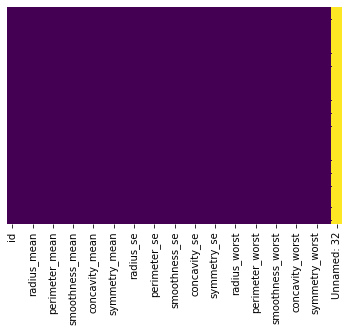

In [11]:
#lets visualize the number of null values in our data
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

#### According to the visualziaiton above, we can tell that we only have null values in the Unnamed column. We will need to drop the column because it will not not play any role in our analysis and prediction

In [12]:
#lets check our column names to pick the accurate name to drop
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [13]:
#lets drop the Unnamed column since it dosen't play any vital role in our data
df.drop(['Unnamed: 32'],axis=1,inplace=True)

In [14]:
#lets check our column names again to make sure unnamed is drop from our data
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Now that we have droped the Unnamed column. lets check again to see if we have any null values in our dataset

In [15]:
#Use .sum() to check the total number of null values in a column
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Looking at the above results, we can tell that we do not have any null or missing values in our dataset

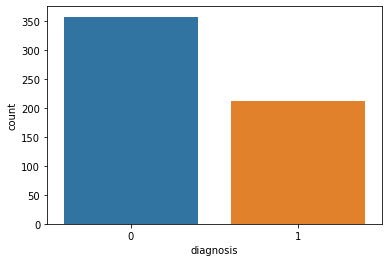

In [16]:
#lets visualize the number of malignant and benign in our dataset
sns.countplot(df['diagnosis'])

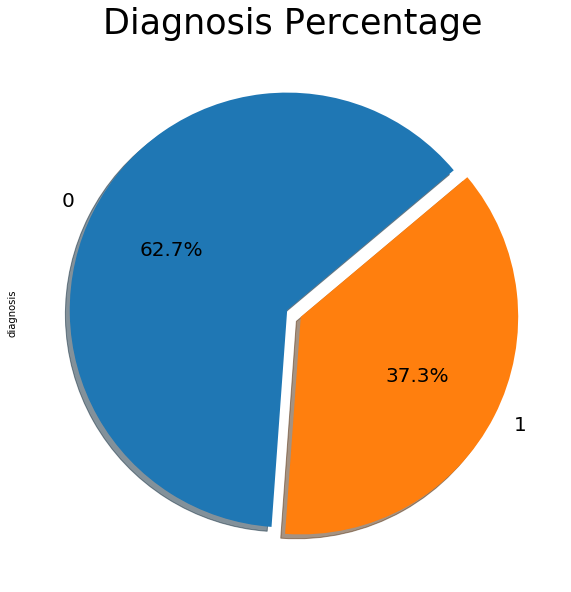

In [17]:
#lets check the percentage of dianosis in our dataset
df['diagnosis'].value_counts().plot.pie(figsize=(12,10),explode=[0.03,0.04],shadow=True, startangle=40,autopct='%1.1f%%',fontsize=20)
plt.title("Diagnosis Percentage",fontsize=35)
plt.show()

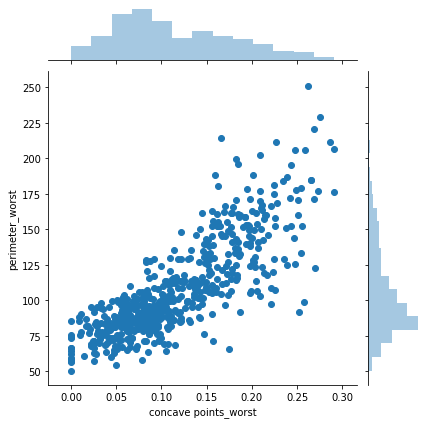

In [18]:
#lets pick 2 of the columns like concave points_worst and perimeter_worst to check the relationshiop
sns.jointplot(df['concave points_worst'],df['perimeter_worst'])

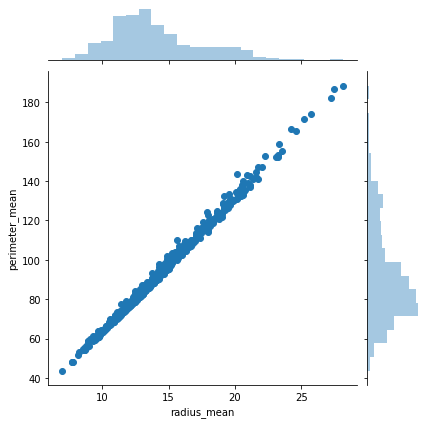

In [19]:
sns.jointplot(df['radius_mean'],df['perimeter_mean'])

(0, 1.5495534710030952)

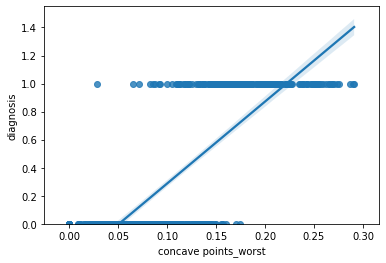

In [20]:
sns.regplot(x='concave points_worst', y='diagnosis', data=df)
plt.ylim(0,)

In [21]:
df['diagnosis'].value_counts(normalize=True)*100

0    62.741652
1    37.258348
Name: diagnosis, dtype: float64

In [22]:
#lets check the statistics of the diagnosis column 
df['diagnosis'].describe()

count    569.000000
mean       0.372583
std        0.483918
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

In [23]:
#lets check the correlation between all the independent variables and dependeant variable diagnosis
df.corr()['diagnosis'].sort_values()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
id                         0.039769
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0

### Above shows the correlation between all the indpendent variables and dependnet varibales. Let's check the columns below and set the more correlated data into df1

In [24]:
#lets check the column names to pick from
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [28]:
#asssign the picked up data to df1
df1 = df[['diagnosis','concave points_worst','perimeter_worst','radius_worst','perimeter_mean','area_worst','radius_mean','area_mean','concavity_mean','concavity_worst','radius_se','perimeter_se','area_se','smoothness_se','fractal_dimension_mean']]

In [30]:
#check the top 5 rows
df1.head()

,diagnosis,concave points_worst,perimeter_worst,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,radius_se,perimeter_se,area_se,smoothness_se,fractal_dimension_mean
0,1,0.2654,184.60,25.38,122.80,2019.0,17.99,1001.0,0.3001,0.7119,1.0950,8.589,153.40,0.006399,0.07871
1,1,0.1860,158.80,24.99,132.90,1956.0,20.57,1326.0,0.0869,0.2416,0.5435,3.398,74.08,0.005225,0.05667
2,1,0.2430,152.50,23.57,130.00,1709.0,19.69,1203.0,0.1974,0.4504,0.7456,4.585,94.03,0.006150,0.05999
3,1,0.2575,98.87,14.91,77.58,567.7,11.42,386.1,0.2414,0.6869,0.4956,3.445,27.23,0.009110,0.09744
4,1,0.1625,152.20,22.54,135.10,1575.0,20.29,1297.0,0.1980,0.4000,0.7572,5.438,94.44,0.011490,0.05883


### Since we have assigned the top independent variables, let visualize it with a heat map

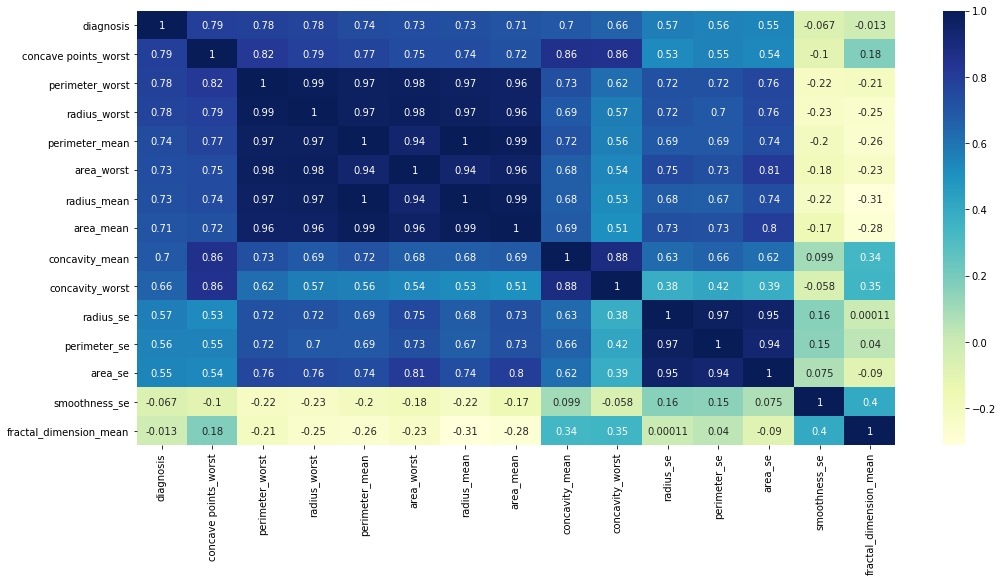

In [31]:
plt.figure(figsize=(17,8))
sns.heatmap(df1.corr(),annot=True, cmap="YlGnBu")

### Looking at the heatmap above, we can tell that they are same dependent variables that are perfectly correlated. Lets get rid of those and add the new data to df3

In [32]:
df3 = df[['diagnosis','concave points_worst','perimeter_worst','radius_worst','area_worst','concavity_worst','texture_worst','smoothness_worst','symmetry_worst','fractal_dimension_worst']]

In [33]:
#lets check the first 5 rows of df3
df3.head()

,diagnosis,concave points_worst,perimeter_worst,radius_worst,area_worst,concavity_worst,texture_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,1,0.2654,184.60,25.38,2019.0,0.7119,17.33,0.1622,0.4601,0.11890
1,1,0.1860,158.80,24.99,1956.0,0.2416,23.41,0.1238,0.2750,0.08902
2,1,0.2430,152.50,23.57,1709.0,0.4504,25.53,0.1444,0.3613,0.08758
3,1,0.2575,98.87,14.91,567.7,0.6869,26.50,0.2098,0.6638,0.17300
4,1,0.1625,152.20,22.54,1575.0,0.4000,16.67,0.1374,0.2364,0.07678


### lets viusualize again and make sure our data looks good to move on to the next process

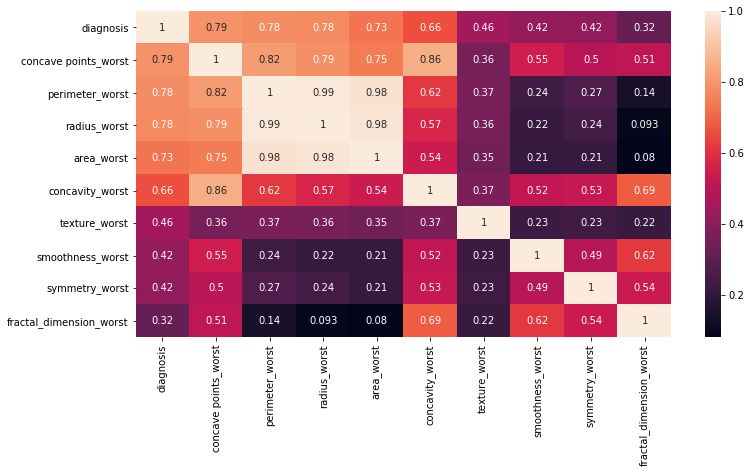

In [35]:
plt.figure(figsize=(12,6))
sns.heatmap(df3.corr(),annot=True)

### the visualizaiton above looks good and we have removed all the unwanted independent variables from our data. Lets move on to normalize our data to make good predecitions

In [36]:
#lets import the library
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
#lets drop the dependent variable from the scaling
scaler.fit(df3.drop('diagnosis',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
#transform the data
scaled_features = scaler.transform(df3.drop('diagnosis',axis=1))

In [40]:
col = [['concave points_worst','perimeter_worst','radius_worst','area_worst','concavity_worst','texture_worst','smoothness_worst','symmetry_worst','fractal_dimension_worst']]
df_new = pd.DataFrame(scaled_features,columns=col)
df_new.head()


,concave points_worst,perimeter_worst,radius_worst,area_worst,concavity_worst,texture_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,2.296076,2.303601,1.886690,2.001237,2.109526,-1.359293,1.307686,2.750622,1.937015
1,1.087084,1.535126,1.805927,1.890489,-0.146749,-0.369203,-0.375612,-0.243890,0.281190
2,1.955000,1.347475,1.511870,1.456285,0.854974,-0.023974,0.527407,1.152255,0.201391
3,2.175786,-0.249939,-0.281464,-0.550021,1.989588,0.133984,3.394275,6.046041,4.935010
4,0.729259,1.338539,1.298575,1.220724,0.613179,-1.466770,0.220556,-0.868353,-0.397100


In [41]:
X = scaled_features
y = df3['diagnosis']

In [42]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

### Now that we have scaled our data. Lets go ahead and split our data to create our machine learning models

## Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
print ('This is Train Shape: ', X_train.shape)
print()
print ('This is Test Shape: ', X_test.shape)

This is Train Shape:  (398, 9)

This is Test Shape:  (171, 9)


## Logistic Regression Model

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
pred = lg.predict(X_test)

In [49]:
pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

### Evaluating Logistic Regression

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print(classification_report(y_test,pred))
print()
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171


[[107   1]
 [  1  62]]


## Support Vector Machine Model

In [52]:
from sklearn.svm import SVC

In [53]:
svc_model = SVC()

In [54]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
predictions = svc_model.predict(X_test)
predictions

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

### Evaluating SVC

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print(classification_report(y_test,predictions))
print()
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


[[106   2]
 [  2  61]]


In [58]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc_model, X_train, y_train)
scores.mean()

0.9698417721518986

## Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dtree = DecisionTreeClassifier()

In [61]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [62]:
predictions = dtree.predict(X_test)
predictions

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

### Evaluating Decision Tree

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
print(classification_report(y_test,predictions))
print()
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       108
           1       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171


[[101   7]
 [  3  60]]


In [65]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scoresdtree = cross_val_score(dtree, X_train, y_train)
scoresdtree.mean()

0.9296518987341773

### Training Random Forest Model

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rfc = RandomForestClassifier(n_estimators=600)

In [68]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
predictions1 = rfc.predict(X_test)

In [70]:
predictions1

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

### Evaluating Random Forest

In [71]:
print(classification_report(y_test,predictions1))
print()
print(confusion_matrix(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


[[106   2]
 [  4  59]]


In [72]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scoresrf = cross_val_score(rfc, X_train, y_train)
scoresrf.mean()

0.9547468354430378

## Accuracies Per Classification

In [73]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

In [74]:
LRpred = lg.predict(X_test)
SVCpredictions = svc_model.predict(X_test)
DTpredictions = dtree.predict(X_test)
RFpredictions1 = rfc.predict(X_test)

In [75]:
#jaccard

LRjacc = jaccard_similarity_score(y_test,LRpred)
SVCjacc = jaccard_similarity_score(y_test,SVCpredictions)
DTjacc = jaccard_similarity_score(y_test,DTpredictions)
RFjacc = jaccard_similarity_score(y_test,RFpredictions1)


#f-score

LRfscore = f1_score(y_test,LRpred,average='weighted')
SVCfscore = f1_score(y_test,SVCpredictions,average='weighted')
DTfscore = f1_score(y_test,DTpredictions,average='weighted')
RFfscore = f1_score(y_test,RFpredictions1,average='weighted')

C:\Users\Michael Osei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


## Classification Algorithm Comparison

In [76]:
dfc = pd.DataFrame([['Logistic Regression',LRjacc,LRfscore],
                   ['SVM',SVCjacc,SVCfscore],
                   ['Decision Tree',DTjacc,DTfscore],
                   ['Random Forest',RFjacc,RFfscore]],
                  columns=['Algorithm','Jaccard','F1-score'])

In [77]:
dfc

,Algorithm,Jaccard,F1-score
0,Logistic Regression,0.988304,0.988304
1,SVM,0.976608,0.976608
2,Decision Tree,0.941520,0.941868
3,Random Forest,0.964912,0.964790


#### Based on Jaccard and F1-score table above, we can tell that Logistic Regression is the best Model to predict breast Cancer with 98% Jaccard and F1-score